Data cleaning


Step 1: Importing Necessary Libraries

- No duplicates
- No blank spaces (ex: `" I love python "` => `"I love python"`)
- No errors
- No empty values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Reading Data into a DataFrame

In [2]:
df = pd.read_json('final_dataset.json')

Step 3: Exploring the DataFrame

In [3]:
print(df.shape)
print(df.info())
print(df.describe())

(118714, 32)
<class 'pandas.core.frame.DataFrame'>
Index: 118714 entries, 2 to 181792
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Url                118714 non-null  object 
 1   BathroomCount      109112 non-null  float64
 2   BedroomCount       118714 non-null  int64  
 3   ConstructionYear   68898 non-null   float64
 4   Country            118714 non-null  object 
 5   District           118707 non-null  object 
 6   Fireplace          4123 non-null    float64
 7   FloodingZone       58342 non-null   object 
 8   Furnished          30325 non-null   float64
 9   Garden             22503 non-null   float64
 10  GardenArea         22503 non-null   float64
 11  Kitchen            67134 non-null   object 
 12  LivingArea         104539 non-null  float64
 13  Locality           118712 non-null  object 
 14  MonthlyCharges     13650 non-null   float64
 15  NumberOfFacades    76942 non-null   float64

Step 4: Data Cleaning and Preprocessing

Delete Blank spaces

In [4]:
df['Url'] = df['Url'].str.strip()
df['Country'] = df['Country'].str.strip()
df['District'] = df['District'].str.strip()
df['FloodingZone'] = df['FloodingZone'].str.strip()
df['Kitchen'] = df['Kitchen'].str.strip()
df['Locality'] = df['Locality'].str.strip()
df['PEB'] = df['PEB'].str.strip()
df['Province'] = df['Province'].str.strip()
df['Region'] = df['Region'].str.strip()
df['StateOfBuilding'] = df['StateOfBuilding'].str.strip()
df['SubtypeOfProperty'] = df['SubtypeOfProperty'].str.strip()
#df['TypeOfSale'] = df['TypeOfSale'].str.strip

Checking for duplicates

In [5]:
df.drop_duplicates('PropertyId',  inplace = True)

In [6]:
df.shape

(118714, 32)

In [7]:
df.columns

Index(['Url', 'BathroomCount', 'BedroomCount', 'ConstructionYear', 'Country',
       'District', 'Fireplace', 'FloodingZone', 'Furnished', 'Garden',
       'GardenArea', 'Kitchen', 'LivingArea', 'Locality', 'MonthlyCharges',
       'NumberOfFacades', 'PEB', 'PostalCode', 'Price', 'PropertyId',
       'Province', 'Region', 'RoomCount', 'ShowerCount', 'StateOfBuilding',
       'SubtypeOfProperty', 'SurfaceOfPlot', 'SwimmingPool', 'Terrace',
       'ToiletCount', 'TypeOfProperty', 'TypeOfSale'],
      dtype='object')

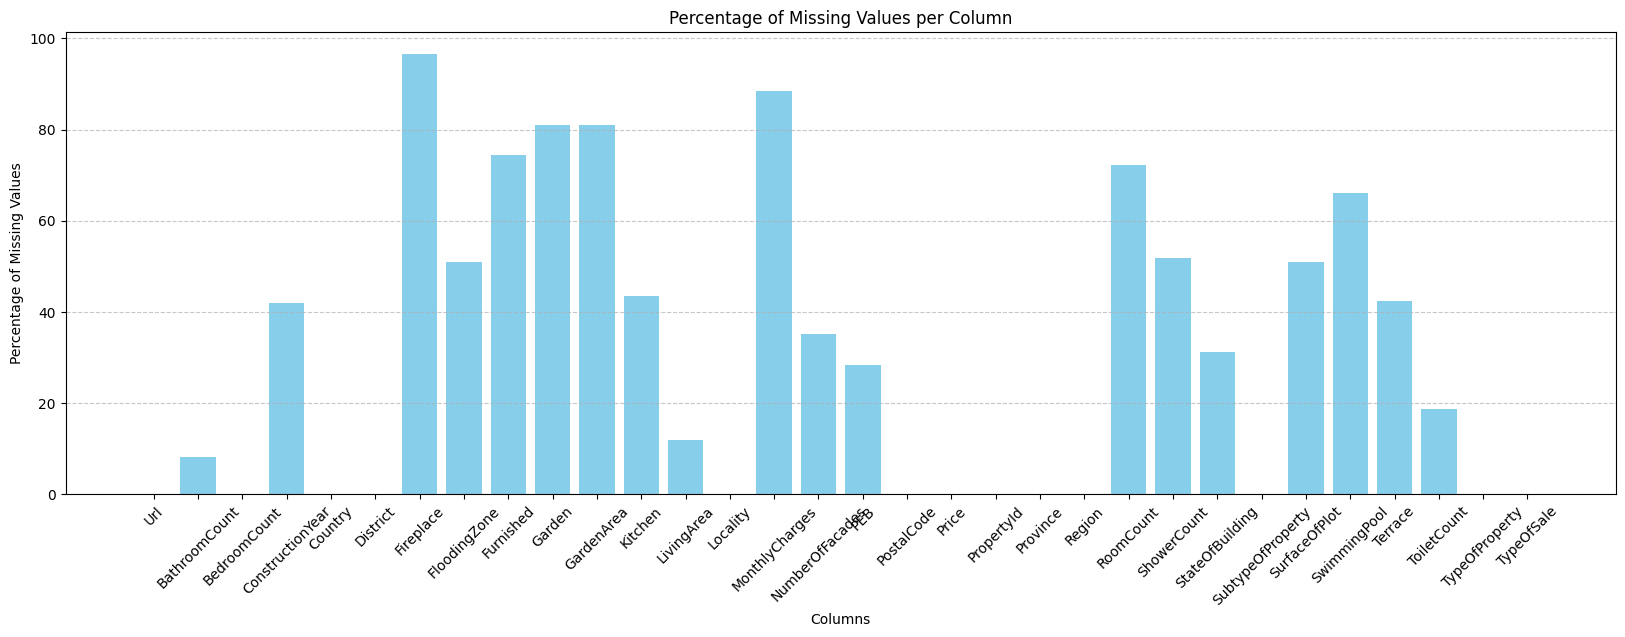

In [8]:
missing_percentage = df.isnull().mean() * 100

missing_percentage_df = missing_percentage.reset_index()
missing_percentage_df.columns = ['Column', 'Missing Percentage']

plt.figure(figsize=(20, 6))
plt.bar(missing_percentage_df['Column'], missing_percentage_df['Missing Percentage'], color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.title('Percentage of Missing Values per Column')
plt.xticks(rotation=45)
plt.show()


Astype int values in  floated columns

REMOVING THE NONSENSE DATA 

In [9]:
df.drop(df[df.BathroomCount > 12].index,inplace=True)
df.drop(df[df.BedroomCount > 10].index,inplace=True)
df.drop(df[df.ConstructionYear > 2028].index,inplace=True)
df.drop(df[df.LivingArea > 1000].index,inplace=True)
df.drop(df[df.NumberOfFacades > 6].index,inplace=True)
df.drop(df[df.RoomCount > 15].index,inplace=True)
df.drop(df[df.ShowerCount > 6].index,inplace=True)
df.drop(df[df.SurfaceOfPlot > 6000].index,inplace=True)
df.drop(df[df.ToiletCount > 6].index,inplace=True)
df.drop(df[df.GardenArea > 4000].index,inplace=True)

Checking for empty values and replace by the median for numerical values and mode for non numerical values


In [10]:
df = df.fillna({'BathroomCount': df['BathroomCount'].median(),
                 'ConstructionYear': df['ConstructionYear'].median(),
                 'GardenArea': df['GardenArea'].median(),
                 'LivingArea': df['LivingArea'].median(), 
                 'MonthlyCharges': df['MonthlyCharges'].median(), 
                 'NumberOfFacades': df['NumberOfFacades'].median(), 
                 'RoomCount': df['RoomCount'].median(), 
                 'ShowerCount': df['ShowerCount'].median(), 
                 'SurfaceOfPlot': df['SurfaceOfPlot'].median(), 
                 'ToiletCount': df['ToiletCount'].median()
                 })

In [11]:
df = df.fillna({'FloodingZone': df['FloodingZone'].mode()[0],
                'Country': df['Country'].mode()[0], 
                'District': df['District'].mode()[0], 
                'Kitchen': df['Kitchen'].mode()[0], 
                'Locality': df['Locality'].mode()[0], 
                'PEB': df['PEB'].mode()[0], 
                'Province': df['Province'].mode()[0], 
                'Region': df['Region'].mode()[0], 
                'StateOfBuilding': df['StateOfBuilding'].mode()[0], 
                'SubtypeOfProperty': df['SubtypeOfProperty'].mode()[0], 
                #'TypeOfSale': df['TypeOfSale'].mode()[0],
                #'Fireplace': df['Fireplace'].fillna(0),
                'Furnished': df['Furnished'].mode()[0],
                'SwimmingPool': df['SwimmingPool'].mode()[0], 
                #'Terrace': df['Terrace'].fillna(0),
                #'Garden': df['Garden'].fillna(0)
                 })

In [12]:
df['Fireplace'] = df['Fireplace'].fillna(0)
df['Terrace'] = df['Terrace'].fillna(0)
df['Garden'] = df['Garden'].fillna(0)

In [13]:
df = df.dropna(subset=['Locality'])

In [14]:
df = df.astype({'BathroomCount': 'int64', 'ConstructionYear': 'int64', 'Fireplace': 'int64', 'Furnished': 'int64', 'Garden': 'int64', 'GardenArea': 'int64', 'LivingArea': 'int64', 'MonthlyCharges':'int64', 'NumberOfFacades': 'int64', 'RoomCount': 'int64', 'ShowerCount': 'int64', 'SurfaceOfPlot': 'int64', 'SwimmingPool': 'int64', 'Terrace': 'int64', 'ToiletCount': 'int64'})
df.head()

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
2,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Belgium,Brugge,0,NON_FLOOD_ZONE,0,0,...,1,0,GOOD,flat_studio,333,0,1,1,2,residential_sale
8,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Belgium,Brugge,0,NON_FLOOD_ZONE,1,0,...,5,0,GOOD,house,0,0,0,2,1,residential_sale
10,https://www.immoweb.be/en/classified/house/for...,1,4,2002,Belgium,Veurne,0,NON_FLOOD_ZONE,0,1,...,5,0,TO_BE_DONE_UP,house,170,0,1,2,1,residential_sale
11,https://www.immoweb.be/en/classified/apartment...,0,2,1972,Belgium,Hasselt,0,NON_FLOOD_ZONE,0,0,...,1,0,AS_NEW,apartment,333,0,1,1,2,residential_sale
14,https://www.immoweb.be/en/classified/apartment...,1,1,1994,Belgium,Brussels,0,NON_FLOOD_ZONE,1,0,...,5,0,AS_NEW,apartment,333,0,1,1,2,residential_sale


In [15]:
#rank state
rank_state = {
    'AS_NEW': 6,
    'JUST_RENOVATED': 5,
    'GOOD': 4,
    'TO_RENOVATE': 3,
    'TO_BE_DONE_UP': 3,
    'TO_RESTORE': 3
}

df['Condition_Rank'] = df['StateOfBuilding'].map(rank_state)

In [16]:
#clean PEB
PEB_to_drop = ['B_A', 'A_A+', 'F_C', 'F_D', 'F_E', 'E_D', 'G_F', 'G_C']
df = df[~df['PEB'].isin(PEB_to_drop)]

In [17]:
#rank PEB
rank_PEB = {
    'G': 1, 
    'F': 2, 
    'E': 3, 
    'D': 4, 
    'C': 5, 
    'B': 6, 
    'A': 7, 
    'A+': 8, 
    'A++': 9
}

df['PEB_Rank'] = df['PEB'].map(rank_PEB)

In [18]:
#clean Kitchen
df = df[~df['Kitchen'].str.startswith('USA_')]

In [19]:
#rank Kitchen
rank_kitchen = {
    'NOT_INSTALLED': 1, 
    'SEMI_EQUIPPED': 2, 
    'INSTALLED': 3, 
    'HYPER_EQUIPPED': 4}
df['Kitchen_Rank'] = df['Kitchen'].map(rank_kitchen)

In [20]:
df.shape

(111300, 35)

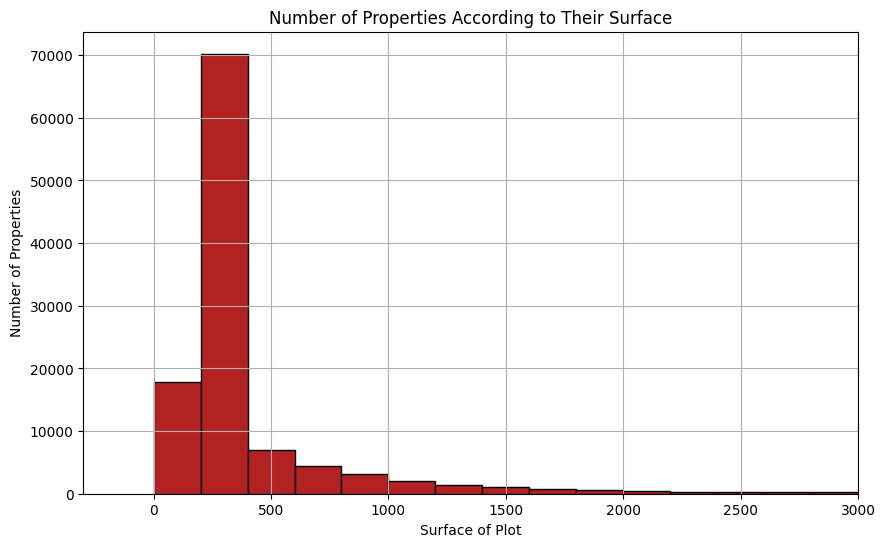

In [21]:
# SurfaceOfPlot histogram 
plt.figure(figsize=(10, 6))
plt.hist(df['SurfaceOfPlot'], bins=30, color='firebrick', edgecolor='black')
plt.xlabel('Surface of Plot')
plt.xlim(right=3000)
plt.ylabel('Number of Properties')
plt.title('Number of Properties According to Their Surface')
plt.grid(True)
plt.show()


In [22]:
#seperating for-sale and for-rent
dfsale = df[df['TypeOfSale'] == "residential_sale"]
dfrent = df[df['TypeOfSale'] == "residential_monthly_rent"]

In [23]:
#removing useless columns for each
dfsale = dfsale.drop(columns=['TypeOfProperty','FloodingZone','Url','MonthlyCharges','Country'])
dfrent = dfrent.drop(columns=['TypeOfProperty','FloodingZone','Url','Country','Furnished'])

In [24]:
#removing nonsense price values for each
dfsale.drop(dfsale[dfsale.Price > 1500000].index,inplace=True)
dfsale.drop(dfsale[dfsale.Price < 90000].index,inplace=True)

dfrent.drop(dfrent[dfrent.Price > 18000].index,inplace=True)
dfrent.drop(dfrent[dfrent.Price < 250].index,inplace=True)
dfrent.drop(dfrent[dfrent.MonthlyCharges > 900].index,inplace=True)

In [25]:
dfrent.shape

(12274, 30)

In [26]:
df.to_csv('DF_cleaned.csv')
dfsale.to_csv('df_cleaned_sale.csv',index=False)
dfrent.to_csv('df_cleaned_rent.csv',index=False)